In [5]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [6]:
data=pd.read_csv(r"D:\traffic.csv")
data

,Date,Views
0,01/06/2021,7831
1,02/06/2021,7798
2,03/06/2021,7401
3,04/06/2021,7054
4,05/06/2021,7973
...,...,...
386,22/06/2022,11154
387,23/06/2022,10382
388,24/06/2022,9555
389,25/06/2022,8502


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    391 non-null    object
 1   Views   391 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.2+ KB


In [7]:
data["Date"] = pd.to_datetime(data["Date"], 
                              format="%d/%m/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


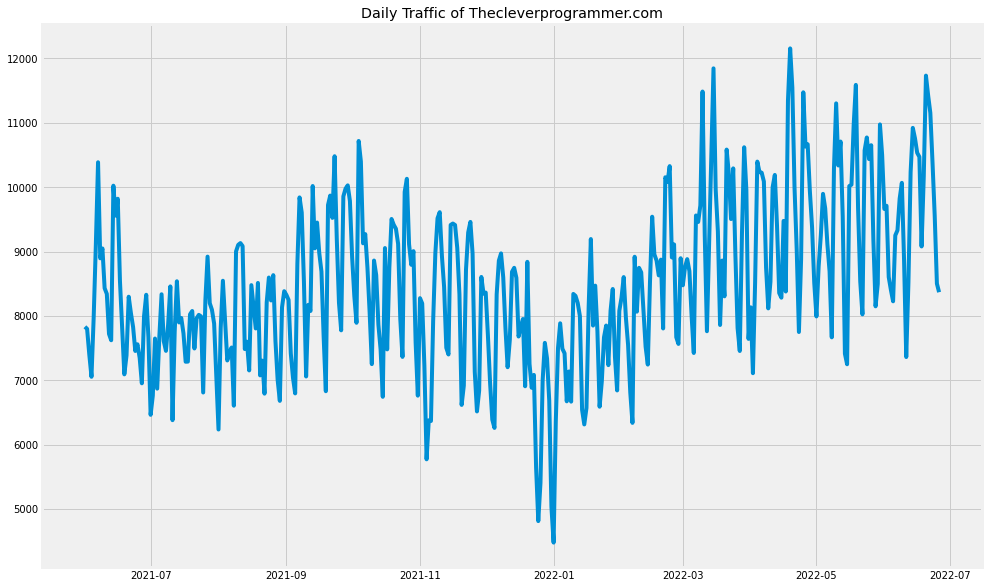

In [8]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()

<Figure size 432x288 with 0 Axes>

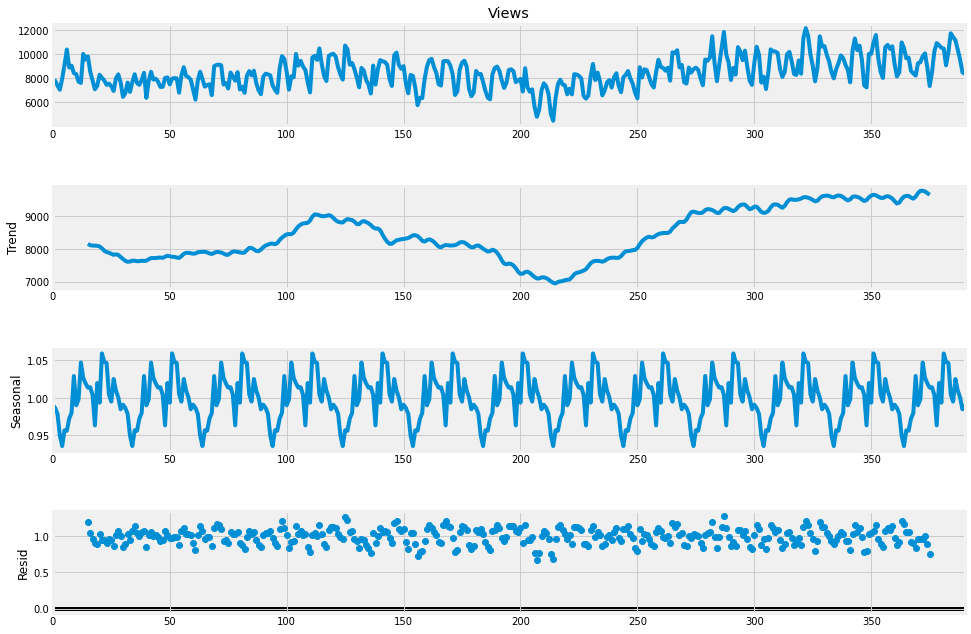

In [21]:
result = seasonal_decompose(data["Views"],
                            period=30,
                            model='multiplicative', 
                            )

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

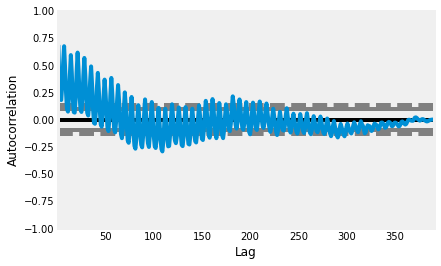

In [22]:
pd.plotting.autocorrelation_plot(data["Views"])

C:\python 3.1\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


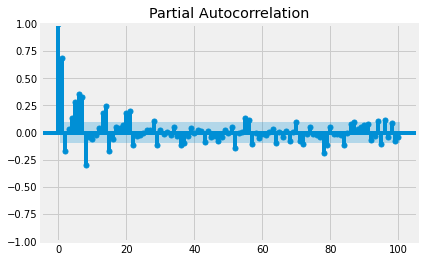

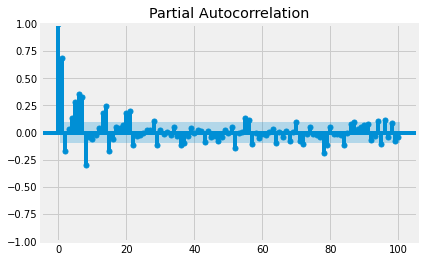

In [23]:
plot_pacf(data["Views"], lags = 100)

In [24]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Views'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\python 3.1\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\python 3.1\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.055
Date:                            Thu, 24 Nov 2022   AIC                           6228.110
Time:                                    17:26:13   BIC                           6287.134
Sample:                                         0   HQIC                          6251.536
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7755      0.131      5.905      0.000       0.518       1.033
ar.L2         -0.7906      0.135   

In [25]:
predictions = model.predict(len(data), len(data)+50)
print(predictions)

391     9876.249960
392    10784.402565
393    10741.832667
394     9865.688905
395     8781.939635
396     8230.529838
397     8931.974265
398     9696.989182
399    10283.824837
400    10614.788376
401     9881.974191
402     9352.863745
403     9019.906543
404     9071.109798
405    10512.177739
406    11003.050671
407    10920.348709
408    10093.767698
409     9432.806063
410     8618.436924
411     9178.692824
412    10364.140537
413    10621.282266
414    10812.063211
415    10269.353856
416     9424.469604
417     8992.843537
418     9155.052259
419     9902.925685
420    10246.994097
421    10739.876122
422     9908.288767
423     9519.429744
424     9014.893218
425     8839.941769
426    10165.034082
427    10876.260491
428    10925.804208
429    10397.342367
430     9430.235448
431     8688.542830
432     8725.235150
433    10082.548679
434    10546.733531
435    10879.087860
436    10466.283380
437     9322.827613
438     9160.891132
439     9361.106546
440    10313.171166


<AxesSubplot:>

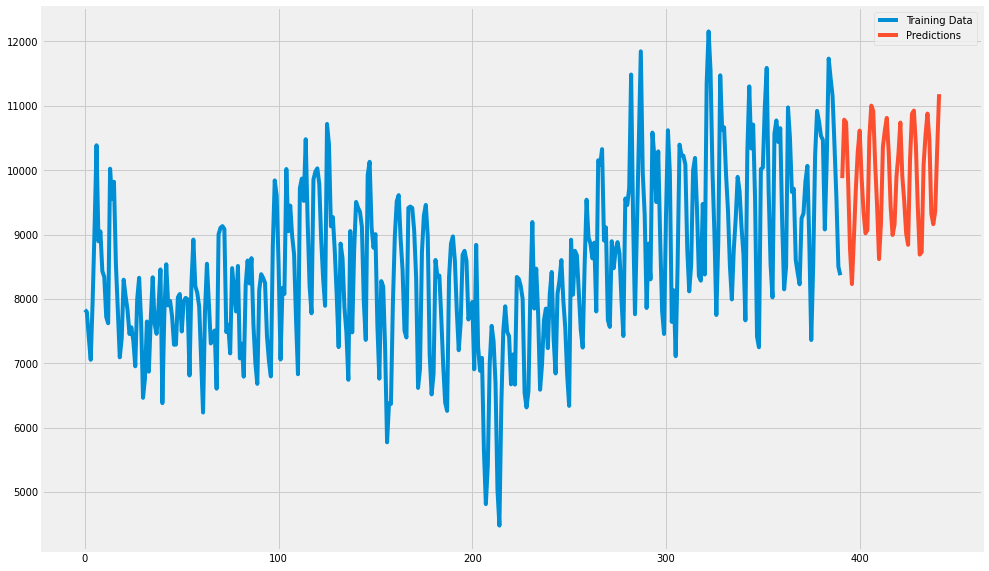

In [26]:
data["Views"].plot(legend=True, label="Training Data", 
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")